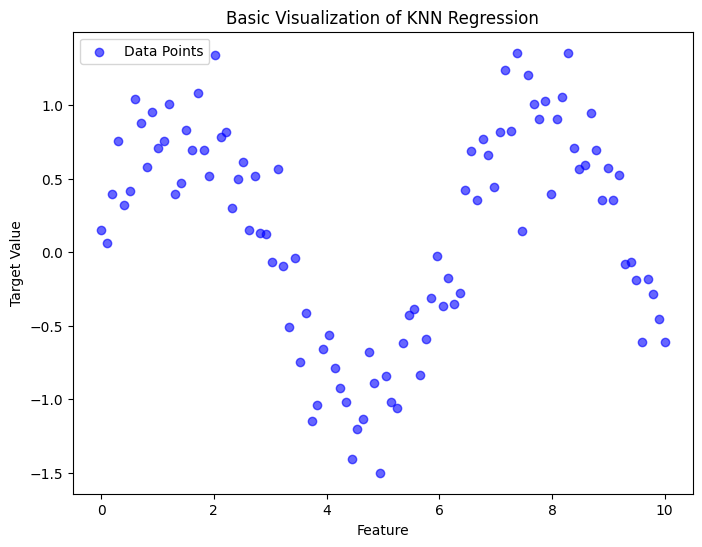

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': np.int64(8), 'weights': 'distance'}
Optimized Model - Mean Squared Error: 0.0683
Optimized Model - R² Score: 0.8686


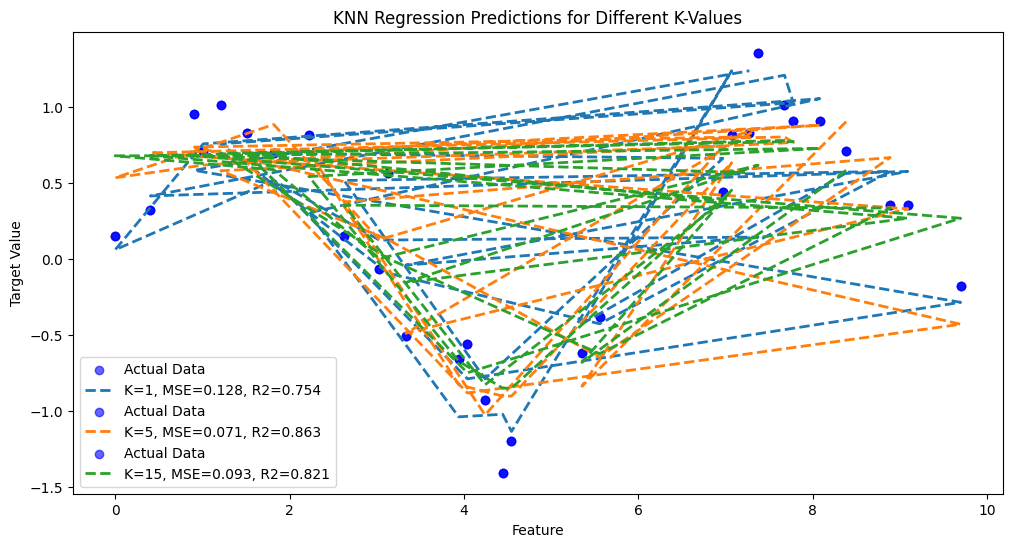

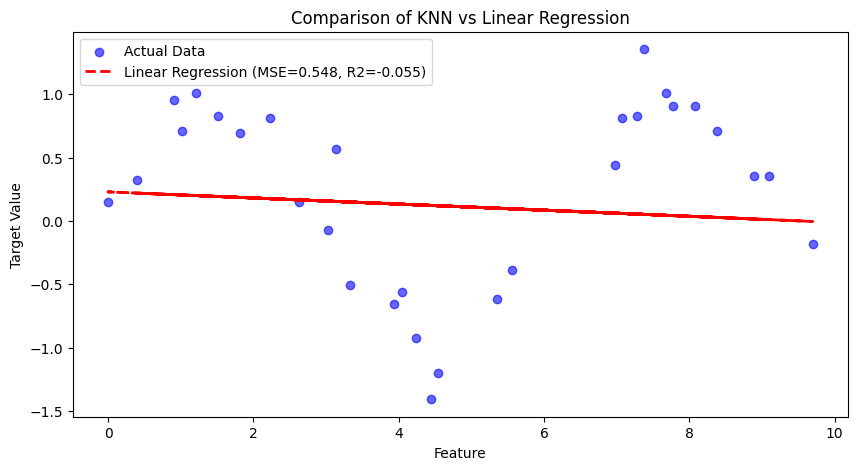

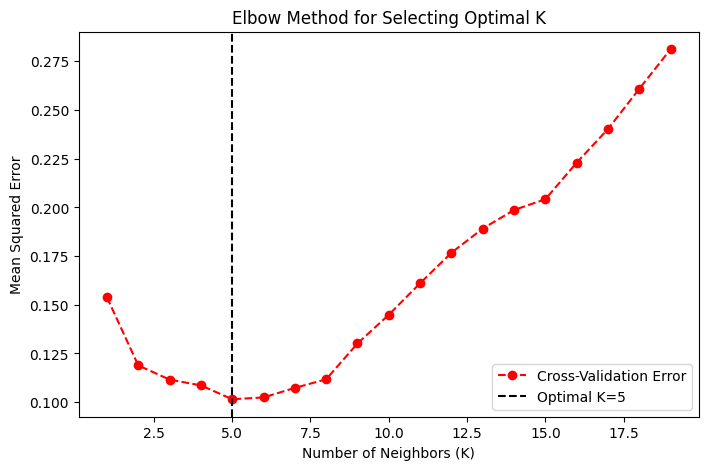

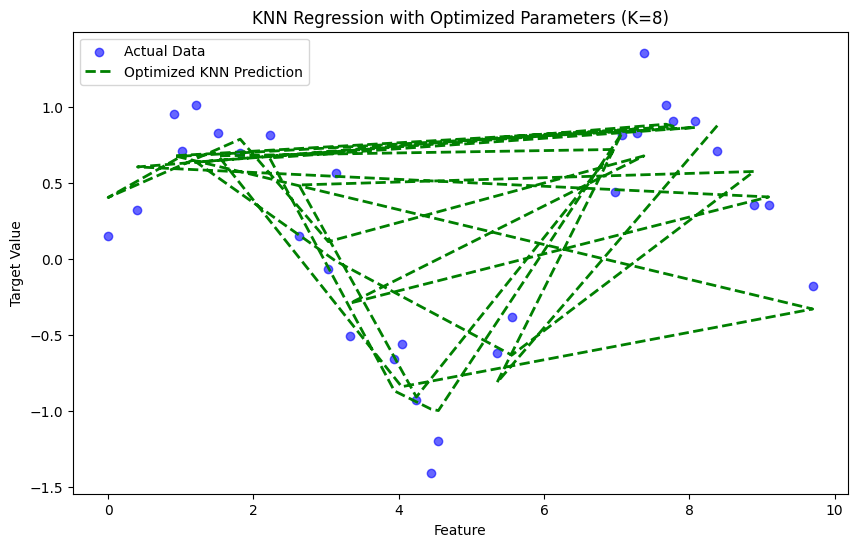

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic dataset for regression
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.3, size=X.shape[0])  # Adding noise

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 **1. Basic KNN Concept Visualization**
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.6, label="Data Points")
plt.title("Basic Visualization of KNN Regression")
plt.xlabel("Feature")
plt.ylabel("Target Value")
plt.legend()
plt.show()

# 📌 **2. Finding Optimal K using Cross-Validation (Elbow Method)**
k_values = range(1, 20)
cv_scores = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn_regressor, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=5)
    cv_scores.append(np.mean(scores))

# Select the best K with the lowest error
optimal_k = k_values[np.argmax(cv_scores)]

# 📌 **3. Hyperparameter Tuning using GridSearchCV**
param_grid = {
    'n_neighbors': np.arange(1, 20, 1),  # Testing values from 1 to 19
    'weights': ['uniform', 'distance'],  # Uniform and distance-based weights
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

# Perform GridSearchCV for hyperparameter tuning
knn_regressor = KNeighborsRegressor()
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the optimized model using the best parameters
best_knn = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'],
                               weights=best_params['weights'],
                               metric=best_params['metric'])
best_knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_optimized = best_knn.predict(X_test_scaled)

# Evaluate model performance
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Model - Mean Squared Error: {mse_optimized:.4f}")
print(f"Optimized Model - R² Score: {r2_optimized:.4f}")

# 📌 **4. Train and Compare KNN Models for Different K-values**
k_values_to_compare = [1, optimal_k, 15]
predictions = {}

plt.figure(figsize=(12, 6))
for k in k_values_to_compare:
    knn_regressor = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn_regressor.fit(X_train_scaled, y_train)

    # Predict on test data
    y_pred = knn_regressor.predict(X_test_scaled)
    predictions[k] = y_pred

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Plot KNN predictions separately
    plt.scatter(X_test, y_test, label="Actual Data", color="blue", alpha=0.6)
    plt.plot(X_test, y_pred, linestyle="dashed", linewidth=2, label=f"K={k}, MSE={mse:.3f}, R2={r2:.3f}")

plt.xlabel("Feature")
plt.ylabel("Target Value")
plt.title("KNN Regression Predictions for Different K-Values")
plt.legend()
plt.show()

# 📌 **5. Compare KNN with Linear Regression**
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label="Actual Data", color="blue", alpha=0.6)
plt.plot(X_test, y_pred_lin, linestyle="dashed", color="red", linewidth=2, label=f"Linear Regression (MSE={mse_lin:.3f}, R2={r2_lin:.3f})")
plt.xlabel("Feature")
plt.ylabel("Target Value")
plt.title("Comparison of KNN vs Linear Regression")
plt.legend()
plt.show()

# 📌 **6. Elbow Method for Selecting Optimal K**
plt.figure(figsize=(8, 5))
plt.plot(k_values, np.abs(cv_scores), marker='o', linestyle='dashed', color='red', label="Cross-Validation Error")
plt.axvline(optimal_k, color='black', linestyle="dashed", label=f"Optimal K={optimal_k}")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.title("Elbow Method for Selecting Optimal K")
plt.legend()
plt.show()

# 📌 **7. Visualize Optimized KNN Predictions**
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label="Actual Data", color="blue", alpha=0.6)
plt.plot(X_test, y_pred_optimized, linestyle="dashed", color="green", linewidth=2, label="Optimized KNN Prediction")
plt.xlabel("Feature")
plt.ylabel("Target Value")
plt.title(f"KNN Regression with Optimized Parameters (K={best_params['n_neighbors']})")
plt.legend()
plt.show()
